In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [583]:
max_load = 10

In [727]:
G=nx.gnm_random_graph(100,300, seed=2)
pos=nx.spring_layout(G)

In [ ]:
plt.figure(figsize=(15,10))
nx.draw(G, pos=pos, with_labels=True, node_size=50, width=0.3, node_color='pink')

In [516]:
list_of_current_weight = random.choices(range(5,9), k=100)

list_of_current_weight = { i : list_of_current_weight[i] for i in range(0, len(list_of_current_weight) ) }

Зададим значение текущей нагрузки для каждой вершины

In [517]:
nx.set_node_attributes(G, list_of_current_weight, 'current_weight')

In [518]:
random_two_epicenters = random.sample(range(0,100), k=2)
random_two_epicenters

for i in random_two_epicenters:
    G.nodes[i]['current_weight'] = max_load

In [519]:
color_map = ['black' if node == max_load else 'pink' for node in nx.get_node_attributes(G, 'current_weight').values()]  

Черным выделены эпицентры графа с максимальной нагруженностью

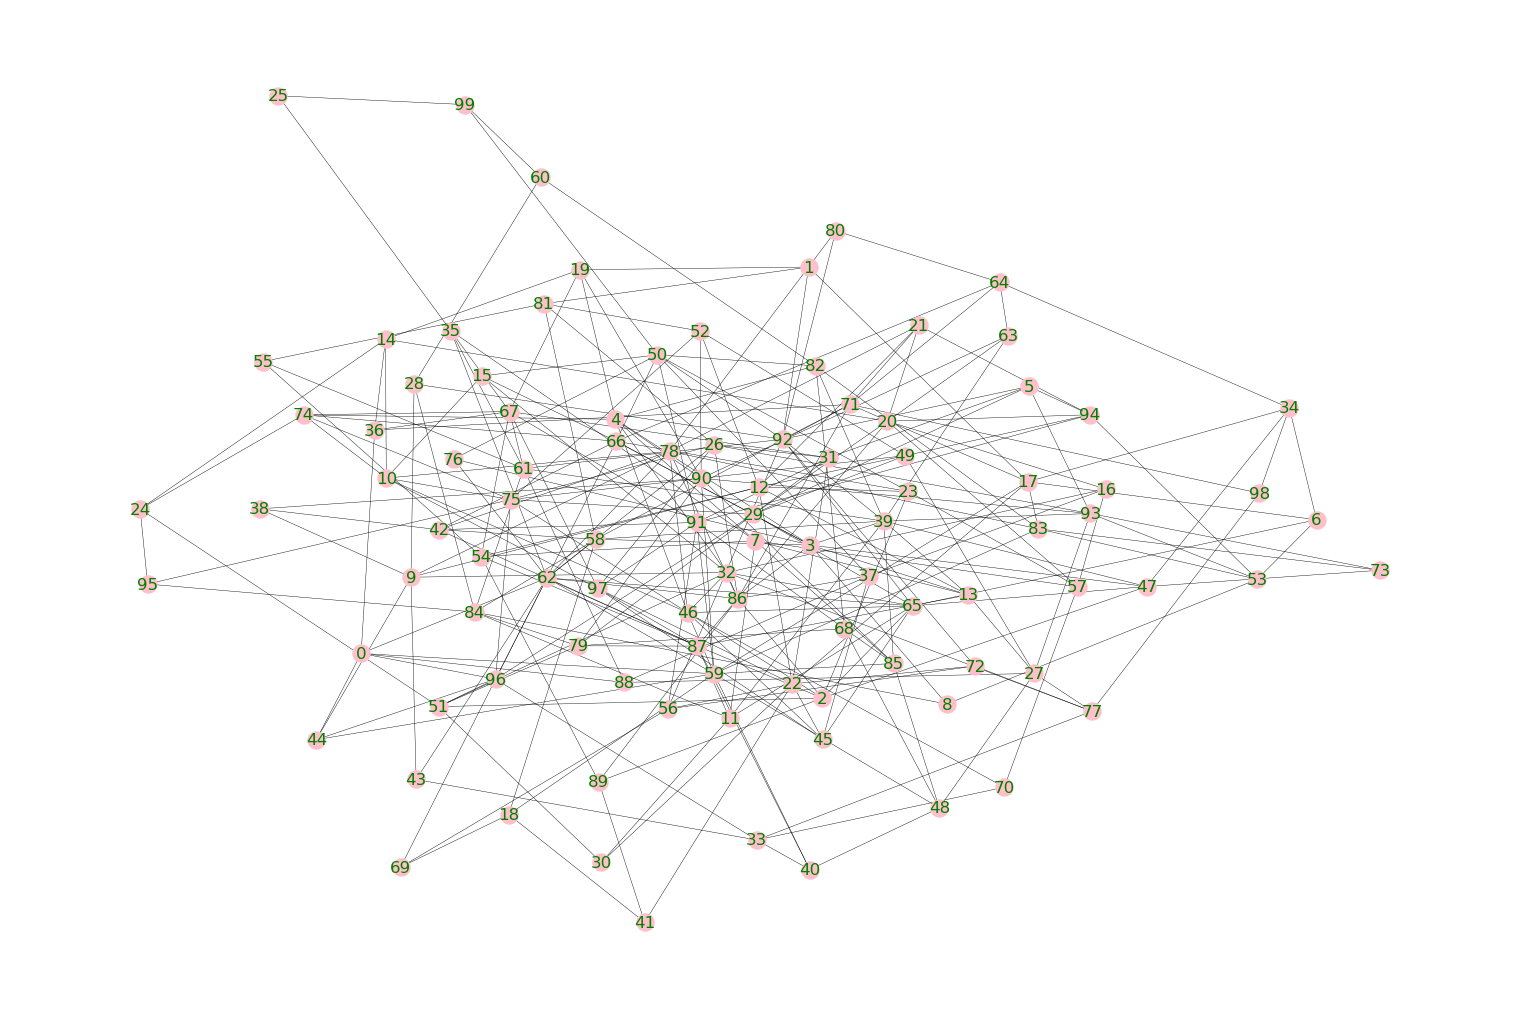

In [757]:
plt.figure(figsize=(15,10))
nx.draw(G,pos=pos, with_labels=True, node_size=150, width=0.3, node_color='pink', font_color='green')

Функция распределения нагруженности для вершин достигших пределельную нагрузку

In [739]:
def remove_and_distribution_loading(G):
    G = G.copy()
    count_of_nodes = []
    flag = True
    iteration_list = []
    iteration = 0
    while flag:
        if (max(nx.get_node_attributes(G, 'current_weight').values(), default=0) < max_load):
            flag = False
            break
        for node in [i for i in nx.get_node_attributes(G, 'current_weight') 
                     if nx.get_node_attributes(G, 'current_weight')[i]>=max_load]:
            load_of_node_value = G.nodes[node]['current_weight']
            if len(list(G.neighbors(node))) != 0:
                distribite_for_neighbors = load_of_node_value/len(list(G.neighbors(node)))
            for neighbor in G.neighbors(node):
                G.nodes[neighbor]['current_weight'] = G.nodes()[neighbor]['current_weight'] + distribite_for_neighbors
            G.remove_node(node)
            iteration+=1
            
            
#             print(nx.get_node_attributes(G, 'current_weight'))
        
        iteration_list.append(iteration)
        plt.figure(figsize=(15,10))
        nx.draw(G, pos=pos, with_labels=True, node_size=150, width=0.3, node_color='pink', font_color='green')
            # возвращает длину списка при каждом удалении вершин и получившийся аттрибуты
        count_of_nodes.append(len(G.nodes))
        
    return count_of_nodes, iteration_list
            


In [760]:
def remove_and_distribution_loading_cycle(G):
    G = G.copy()
    list_of_current_weight = random.choices(range(5,9), k=100)
    list_of_current_weight = { i : list_of_current_weight[i] for i in range(0, len(list_of_current_weight) ) }
    nx.set_node_attributes(G, list_of_current_weight, 'current_weight')
    random_two_epicenters = random.sample(range(0,100), k=2)
    random_two_epicenters

    for j in random_two_epicenters:
        G.nodes[j]['current_weight'] = 10

    print(nx.get_node_attributes(G, 'current_weight'))
    color_map = ['black' if node == max_load else 'pink' for node in nx.get_node_attributes(G, 'current_weight').values()]
    plt.figure(figsize=(15,10))
    nx.draw(G, pos=pos, with_labels=True, node_size=150, width=0.3, node_color=color_map, font_color='green')
    count_of_nodes, iteration_list = remove_and_distribution_loading(G)
    return count_of_nodes, iteration_list

{0: 6, 1: 6, 2: 5, 3: 8, 4: 8, 5: 8, 6: 7, 7: 8, 8: 8, 9: 8, 10: 6, 11: 8, 12: 5, 13: 6, 14: 5, 15: 7, 16: 6, 17: 7, 18: 7, 19: 6, 20: 7, 21: 7, 22: 10, 23: 7, 24: 8, 25: 7, 26: 8, 27: 5, 28: 10, 29: 5, 30: 8, 31: 7, 32: 7, 33: 5, 34: 5, 35: 7, 36: 8, 37: 8, 38: 6, 39: 8, 40: 8, 41: 6, 42: 8, 43: 6, 44: 5, 45: 6, 46: 5, 47: 8, 48: 6, 49: 8, 50: 7, 51: 6, 52: 5, 53: 7, 54: 6, 55: 5, 56: 6, 57: 7, 58: 5, 59: 6, 60: 5, 61: 6, 62: 6, 63: 6, 64: 5, 65: 5, 66: 5, 67: 8, 68: 8, 69: 5, 70: 7, 71: 5, 72: 7, 73: 6, 74: 5, 75: 8, 76: 7, 77: 7, 78: 8, 79: 8, 80: 7, 81: 7, 82: 5, 83: 7, 84: 6, 85: 6, 86: 5, 87: 6, 88: 5, 89: 5, 90: 5, 91: 7, 92: 7, 93: 7, 94: 8, 95: 7, 96: 5, 97: 7, 98: 6, 99: 8}


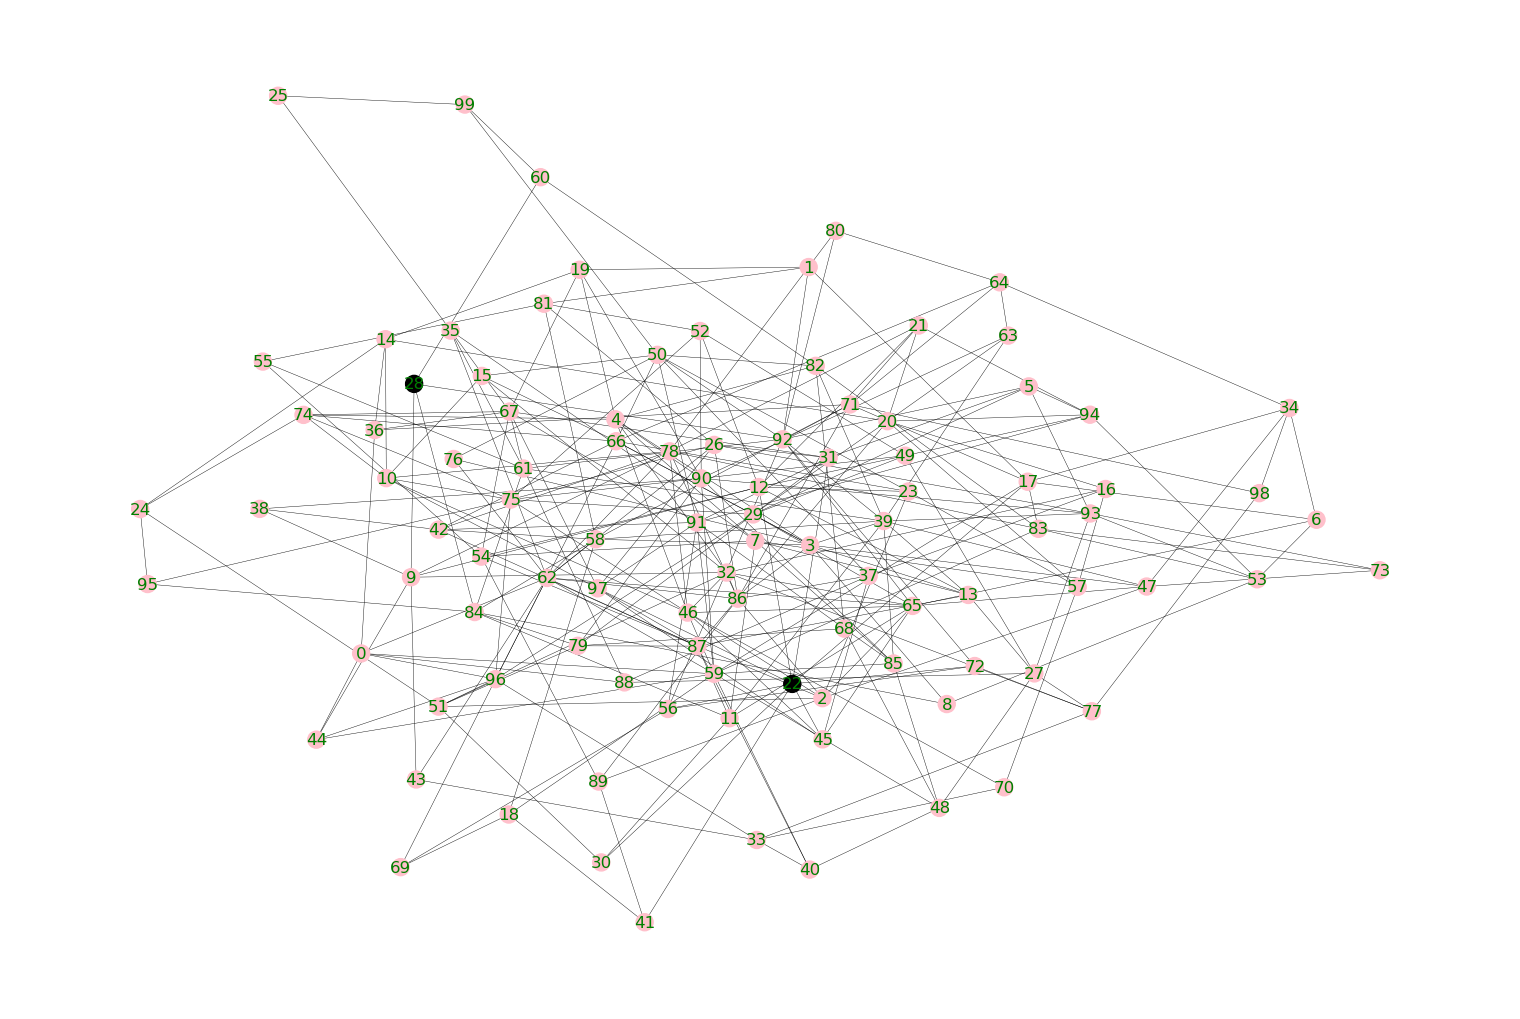

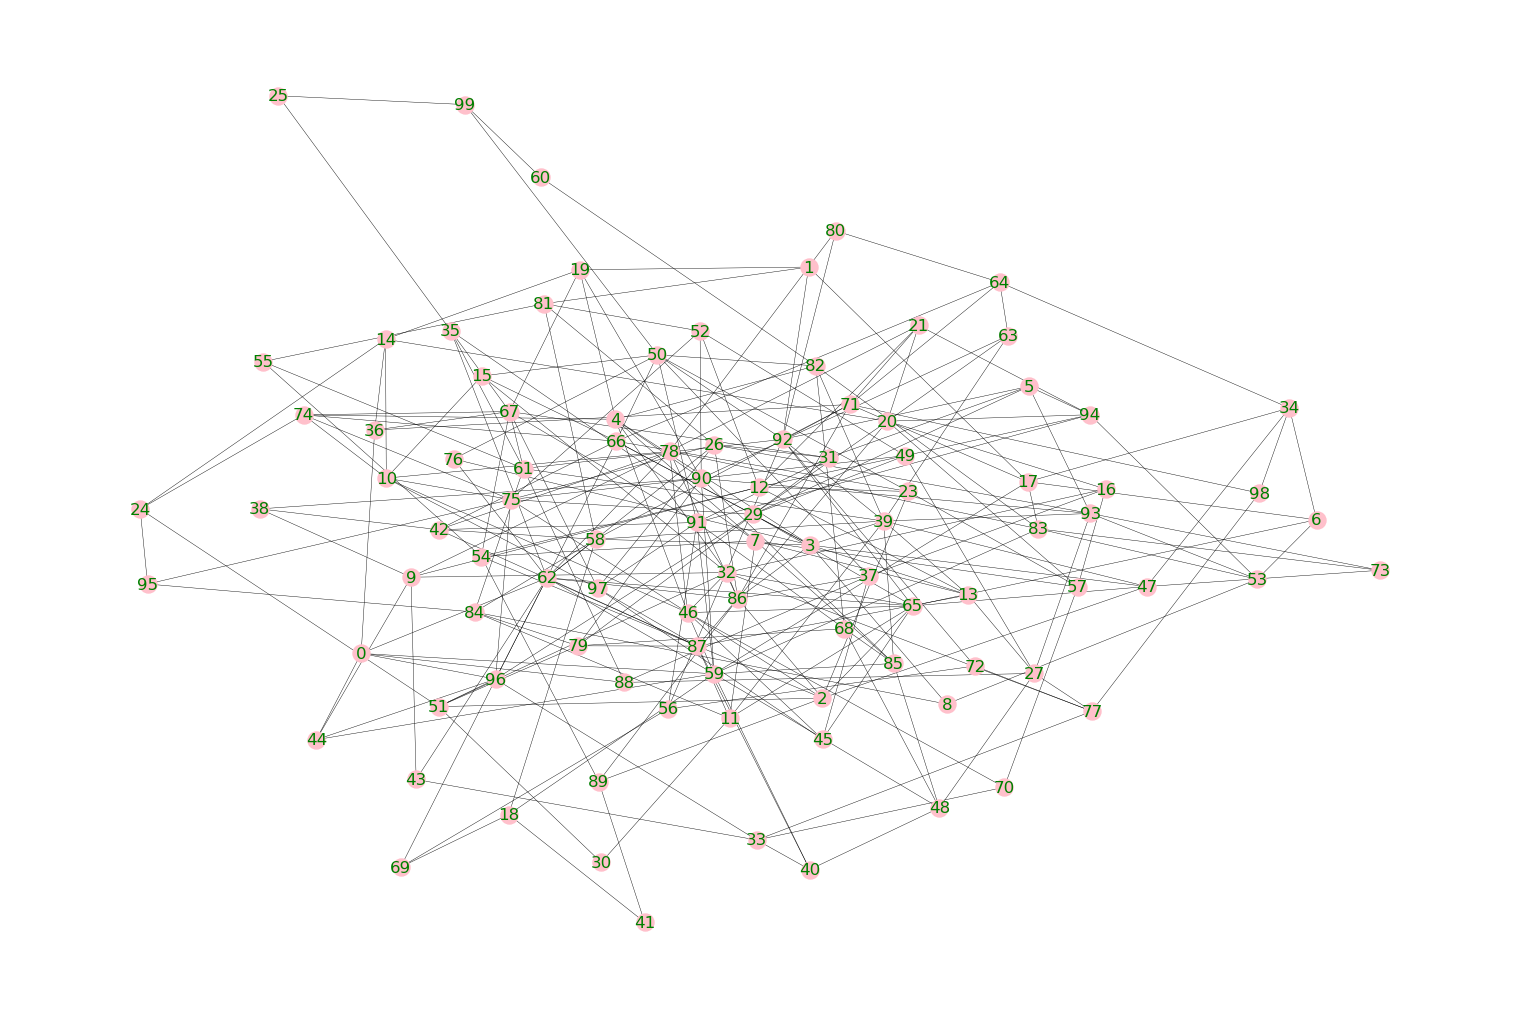

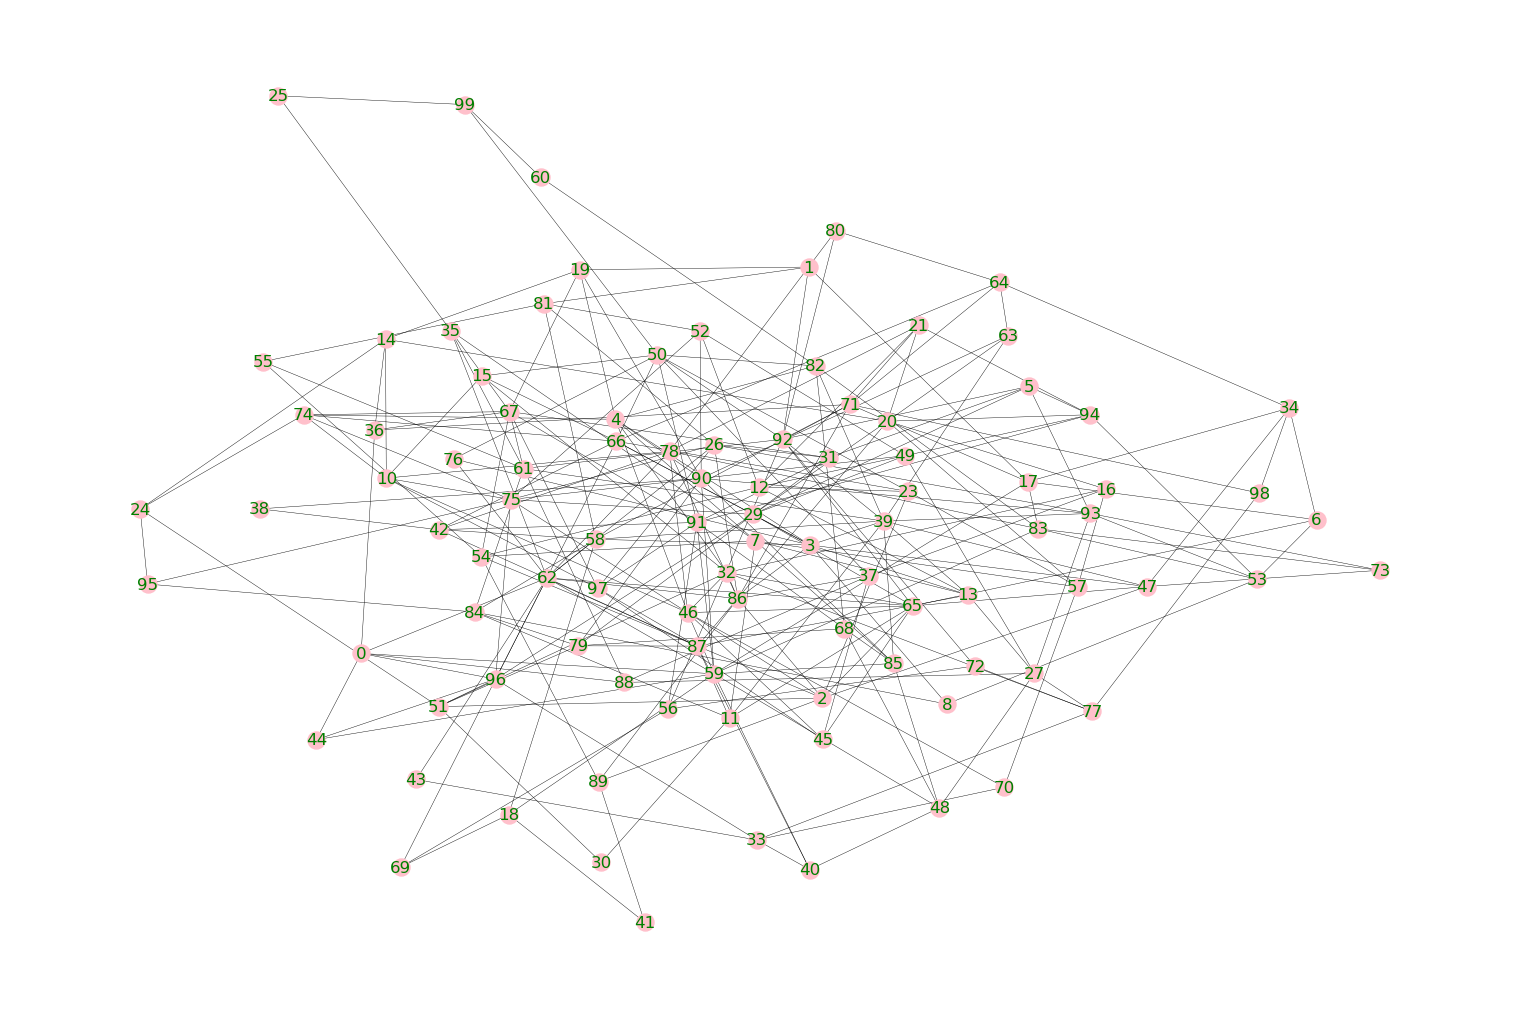

In [761]:
count_of_nodes, iteration_list = remove_and_distribution_loading_cycle(G)

In [762]:
count_of_nodes

[98, 97]

In [763]:
iteration_list

[2, 3]

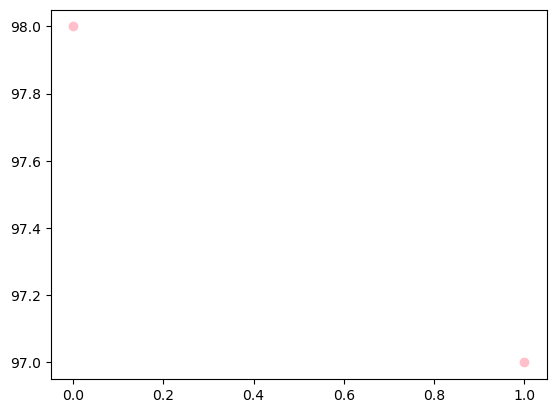

In [765]:
plt.scatter(range(2), count_of_nodes, color='pink')